In [1]:
!pip install tweepy

In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/alexmultak/Desktop/gwu-arl-data-pt-03-2020-u-c/01-Class-Activities/Mon-Wed-Class/07-Social-Analytics/2/Activities/01-Evr_Tweepy_Intro/Solved


In [5]:
# In this case, we are changing it to seven levels up
os.chdir(os.path.join('..','..','..','..','..','..','..'))

In [6]:
# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/Users/alexmultak/Desktop/gwu-arl-data-pt-03-2020-u-c'

In [7]:
# This will search for the config file in the working directory
# Be sure that your config file is in your root repo folder

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [8]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# Target User Account
target_user = ["BBC", "CBSNews", "CNN", "Fox", "nytimes"]

In [10]:
data = []
for user in target_user:
    
    public_tweets = api.user_timeline(user, count=100)
    
    tweets = []
    times = []    
    
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        timestamp = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        tweets.append((tweet_text, timestamp))
        
    for tweet_text, timestamp in tweets:
        results = analyzer.polarity_scores(tweet_text)
        results["tweet"] = tweet_text
        results["time"] = timestamp
        results["source"] = user
        data.append(results)

In [12]:
tweetnews = pd.DataFrame(data)

In [13]:
tweetnews.sort_values("time")

,neg,neu,pos,compound,tweet,time,source
399,0.000,0.884,0.116,0.2732,How does it work to get tested for #COVID19 in...,2020-04-30 08:03:41+00:00,Fox
398,0.119,0.881,0.000,-0.4019,Me &amp; my partner been living in isolation s...,2020-04-30 08:03:41+00:00,Fox
397,0.096,0.846,0.058,-0.2500,I did develop a sore throat &amp; a bit of sne...,2020-04-30 08:03:41+00:00,Fox
396,0.000,1.000,0.000,0.0000,While she did say that it’s unlikely it would ...,2020-04-30 08:03:42+00:00,Fox
395,0.000,1.000,0.000,0.0000,I look up the information for where to get tes...,2020-04-30 08:03:42+00:00,Fox
...,...,...,...,...,...,...,...
402,0.000,1.000,0.000,0.0000,Some publishers have said the coming wave of b...,2020-05-18 17:50:06+00:00,nytimes
100,0.000,0.862,0.138,0.3400,New York Governor Andrew Cuomo urges pro sport...,2020-05-18 17:59:59+00:00,CBSNews
401,0.072,0.821,0.106,0.1779,We asked readers to share their experiences of...,2020-05-18 18:00:09+00:00,nytimes
200,0.000,1.000,0.000,0.0000,Office Depot stock surged Monday after announc...,2020-05-18 18:00:12+00:00,CNN


In [14]:
cnn = tweetnews[tweetnews["source"]=="CNN"]
cbs = tweetnews[tweetnews["source"]=="CBSNews"]
bbc = tweetnews[tweetnews["source"]=="BBC"]
fox = tweetnews[tweetnews["source"]=="Fox"]
nyt = tweetnews[tweetnews["source"]=="nytimes"]

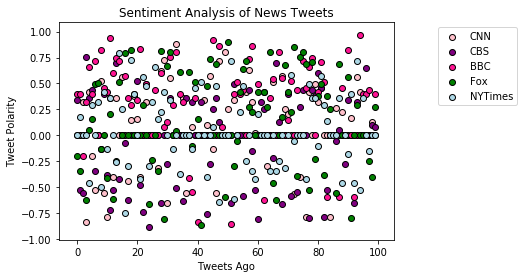

In [15]:
plt.scatter(x=range(len(cnn)), y=cnn["compound"], c="pink", label="CNN", edgecolors='k')
plt.scatter(x=range(len(cbs)), y=cbs["compound"], c="purple", label="CBS",  edgecolors='k')
plt.scatter(x=range(len(bbc)), y=bbc["compound"], c="deeppink", label="BBC",  edgecolors='k')
plt.scatter(x=range(len(fox)), y=fox["compound"], c="green", label="Fox",  edgecolors='k')
plt.scatter(x=range(len(nyt)), y=nyt["compound"], c="lightblue", label="NYTimes",  edgecolors='k')

plt.title("Sentiment Analysis of News Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(loc=9, bbox_to_anchor=(1.25, 1))

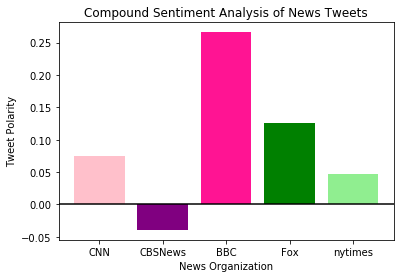

In [16]:
plt.bar(x=cnn["source"], height=cnn["compound"].mean(), color="pink", label="CNN")
plt.bar(x=cbs["source"], height=cbs["compound"].mean(), color="purple", label="CBS")
plt.bar(x=bbc["source"], height=bbc["compound"].mean(), color="deeppink", label="BBC")
plt.bar(x=fox["source"], height=fox["compound"].mean(), color="green", label="Fox")
plt.bar(x=nyt["source"], height=nyt["compound"].mean(), color="lightgreen", label="NYTimes")

# Set a Title, axis labels, legend
plt.title("Compound Sentiment Analysis of News Tweets")
plt.xlabel("News Organization")
plt.ylabel("Tweet Polarity")
plt.axhline(c="black")

#output image
#plt.savefig('sentiment_bar.png')

**Obeservations:**
-- 
1) The scatter plot shows us that the tone of BBC's last 100 tweets were the most neutral out of all of the news sources. 
2) The bar graph shows us that CBS News' tweets had the most negative sentiment out of all of the news sources over the last 100 tweets. 
3) Out of all of the new sources, CNN and NY Times last 100 tweets were the most similar. The tone of their tweets were close as we could see by both the bar graph and the scatter plot.

In [17]:
#convert df to csv
tweetnews.to_csv('twitterdata.csv') 